In [1]:
# import dependecies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
from config import weather_key
from scipy.stats import linregress
from citipy import citipy
import json

In [2]:
# save config information
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# building partial query url
query_url = f'{url}appid={weather_key}&units={units}&q='

In [3]:
# range of latitude and longitude
lat = (-90,90)
lng = (-180,180)

# define count to pass through
count = 0
set_counter = 0

In [4]:
# list to hold cities and coordinates
cities = []
latutides_longitudes = []


# using uniform distribution, create a set of random latitudes and longitudes
latitudes = np.random.uniform(low=-90.0000, high=90.0000, size=1500)
longitudes = np.random.uniform(low=-180.0000, high=180.0000, size=1500)
latitudes_longitudes = zip(latitudes, longitudes)

# identify nearest city for each coordinates combination
for lat_lng in latitudes_longitudes:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities: # only add to list if the city found is unique
        cities.append(city)
        
#print(cities)
#len(cities)

# get a glimpse of the json print for df variable creation
response = requests.get(query_url+city).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -54.8,
        "lon": -68.3
    },
    "dt": 1655590145,
    "id": 3833367,
    "main": {
        "feels_like": 18.03,
        "humidity": 80,
        "pressure": 1005,
        "temp": 29.86,
        "temp_max": 29.86,
        "temp_min": 29.86
    },
    "name": "Ushuaia",
    "sys": {
        "country": "AR",
        "id": 8303,
        "sunrise": 1655557076,
        "sunset": 1655583046,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 250,
        "speed": 17.27
    }
}


#  API calls

In [23]:
# set empty lists of variables for df creation 
# info = 0
citi = []
latitudes = []
longitudes = []
cloudiness = []
humidity = []
temperatures = []
windspeed = []
country = []
city_name = []
date = []


print('Beginning data retrieval\n----------------------------')
# loop through url info to generate dataframe columns
for city in cities:
    
    # create search query
    response = requests.get(query_url + city).json()
    try:
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        temperatures.append(response['main']['temp'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    
        if count < 50: 
            count = 1
            set_counter += 1
            citi.append(city)
        else:
            count = 1
            set_counter += 1
        print(f'Processing record {count} for set {set_counter} | {city}')
    except Exception:
        print(f'City not found. Skipping...')
print('----------\nData retrieval complete:)\n-----------')

Beginning data retrieval
----------------------------
Processing record 1 for set 558 | albany
Processing record 1 for set 559 | hermanus
Processing record 1 for set 560 | sciacca
City not found. Skipping...
Processing record 1 for set 561 | hervey bay
Processing record 1 for set 562 | tateyama
City not found. Skipping...
City not found. Skipping...
Processing record 1 for set 563 | mataura
Processing record 1 for set 564 | souillac
Processing record 1 for set 565 | mogadishu
Processing record 1 for set 566 | hay river
Processing record 1 for set 567 | hilo
Processing record 1 for set 568 | barrow
Processing record 1 for set 569 | alofi
Processing record 1 for set 570 | chekhov
Processing record 1 for set 571 | rikitea
Processing record 1 for set 572 | howard springs
Processing record 1 for set 573 | chifeng
Processing record 1 for set 574 | nha trang
Processing record 1 for set 575 | vardo
Processing record 1 for set 576 | benguela
Processing record 1 for set 577 | nanortalik
Processi

Processing record 1 for set 738 | cabedelo
Processing record 1 for set 739 | fujin
Processing record 1 for set 740 | abu samrah
Processing record 1 for set 741 | kudahuvadhoo
Processing record 1 for set 742 | campbell river
Processing record 1 for set 743 | vila franca do campo
Processing record 1 for set 744 | waiuku
Processing record 1 for set 745 | cherskiy
Processing record 1 for set 746 | longyearbyen
Processing record 1 for set 747 | san francisco
Processing record 1 for set 748 | pirogovskiy
Processing record 1 for set 749 | kenai
Processing record 1 for set 750 | chabahar
Processing record 1 for set 751 | visnes
Processing record 1 for set 752 | yoichi
Processing record 1 for set 753 | moron
Processing record 1 for set 754 | porto-vecchio
Processing record 1 for set 755 | komsomolskiy
City not found. Skipping...
Processing record 1 for set 756 | high level
Processing record 1 for set 757 | mar del plata
Processing record 1 for set 758 | beloha
Processing record 1 for set 759 | 

Processing record 1 for set 917 | leningradskiy
Processing record 1 for set 918 | mombetsu
Processing record 1 for set 919 | brewster
Processing record 1 for set 920 | rajula
Processing record 1 for set 921 | sobolevo
Processing record 1 for set 922 | sambava
Processing record 1 for set 923 | pahrump
Processing record 1 for set 924 | fortuna
Processing record 1 for set 925 | lima
Processing record 1 for set 926 | leshukonskoye
Processing record 1 for set 927 | harper
Processing record 1 for set 928 | iqaluit
Processing record 1 for set 929 | dillon
City not found. Skipping...
Processing record 1 for set 930 | ust-kuyga
Processing record 1 for set 931 | chulman
Processing record 1 for set 932 | guangyuan
Processing record 1 for set 933 | soverato
Processing record 1 for set 934 | kupang
Processing record 1 for set 935 | horsham
Processing record 1 for set 936 | mount pleasant
Processing record 1 for set 937 | smithers
Processing record 1 for set 938 | xining
Processing record 1 for set 

Processing record 1 for set 1093 | orlik
Processing record 1 for set 1094 | naze
Processing record 1 for set 1095 | sinnamary
Processing record 1 for set 1096 | davila
Processing record 1 for set 1097 | port keats
Processing record 1 for set 1098 | baoqing
Processing record 1 for set 1099 | north kessock
Processing record 1 for set 1100 | timizart
Processing record 1 for set 1101 | labe
Processing record 1 for set 1102 | winslow
Processing record 1 for set 1103 | samana
Processing record 1 for set 1104 | te horo
Processing record 1 for set 1105 | sulangan
Processing record 1 for set 1106 | sistranda
Processing record 1 for set 1107 | raymond
Processing record 1 for set 1108 | caravelas
Processing record 1 for set 1109 | srednekolymsk
Processing record 1 for set 1110 | nacala
City not found. Skipping...
Processing record 1 for set 1111 | sorland
Processing record 1 for set 1112 | flin flon
Processing record 1 for set 1113 | casambalangan
Processing record 1 for set 1114 | zhigansk
-----

## Dataframe creation and cleaning

In [7]:
# create dictionary 
info_df = pd.DataFrame({
    'City': citi,
    'Country':country,
    'Latitude':latitudes,
    'Longitude':longitudes,
    'Humidity':humidity,
    'Windspeed':windspeed,
    'Cloudiness':cloudiness,
    'Temperatures':temperatures,
    'Date':date
})
info_df.head()

# save the csv
#info_df.to_csv('weather_df', encoding='utf-8',index=False)

,City,Country,Latitude,Longitude,Humidity,Windspeed,Cloudiness,Temperatures,Date
0,albany,US,42.6001,-73.9662,81,1.99,98,54.03,1655590155
1,hermanus,ZA,-34.4187,19.2345,74,11.34,7,47.80,1655590156
2,sciacca,IT,37.5082,13.0881,68,2.33,12,70.95,1655590156
3,hervey bay,AU,-25.2986,152.8535,74,15.17,4,60.96,1655590157
4,tateyama,JP,34.9833,139.8667,87,0.74,100,73.09,1655590157


In [8]:
# get summary statistics
info_df.describe()

,Latitude,Longitude,Humidity,Windspeed,Cloudiness,Temperatures,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,20.635910,15.227913,70.421903,8.512998,57.890485,66.028725,1.655590e+09
std,33.482057,91.744376,20.005478,6.204192,38.864511,13.640905,6.624212e+01
min,-54.800000,-175.200000,5.000000,0.000000,0.000000,29.860000,1.655590e+09
25%,-8.050000,-68.330100,58.000000,4.000000,20.000000,55.870000,1.655590e+09
50%,25.538400,15.651400,75.000000,6.910000,69.000000,66.610000,1.655590e+09
75%,48.668600,100.335400,85.000000,11.500000,99.000000,77.490000,1.655590e+09
max,78.218600,179.316700,100.000000,39.120000,100.000000,100.600000,1.655590e+09


In [9]:
# remove cities with humidity >100
# info_df['Humidity'].value_counts()
humidity_check = info_df.sort_values('Humidity', ascending=False)
print('No values >100 in humidity, thus plot!')
humidity_check.head()

No values >100 in humidity, thus plot!


,City,Country,Latitude,Longitude,Humidity,Windspeed,Cloudiness,Temperatures,Date
515,manado,ID,1.4870,124.8455,100,1.14,40,75.97,1655590316
251,pontianak,ID,-0.0333,109.3333,100,3.44,38,75.18,1655590233
324,nanae,JP,41.8833,140.6833,100,2.30,75,61.03,1655590258
123,yilan,TW,24.7570,121.7530,99,3.49,100,79.99,1655590061
357,lososina,RU,48.9975,140.3106,99,1.77,100,50.36,1655590270


In [10]:
info_df.dtypes

City             object
Country          object
Latitude        float64
Longitude       float64
Humidity          int64
Windspeed       float64
Cloudiness        int64
Temperatures    float64
Date              int64
dtype: object

## Plotting scatterplots

In southern hemisphere lat < 0: There is a positive correlation of temperatures to latitude
In northern hemisphere lat > 0: There is a negative correlation of temperatures to latitude


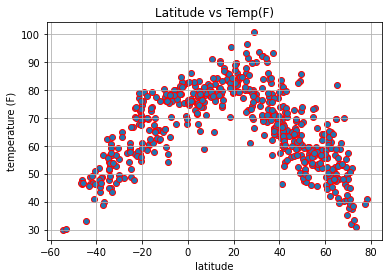

In [11]:
# create temp vs lat scatter
y1= info_df['Temperatures']
x1= info_df['Latitude']
plt.scatter(x1,y1, marker='o',edgecolors='red')
plt.grid()
plt.xlabel('latitude')
plt.ylabel('temperature (F)')
plt.title('Latitude vs Temp(F)')
plt.savefig('temp_vs_lat.png')
plt.show
print('In southern hemisphere lat < 0: There is a positive correlation of temperatures to latitude')
print('In northern hemisphere lat > 0: There is a negative correlation of temperatures to latitude')


There is no correlation detected between latitude and humidity


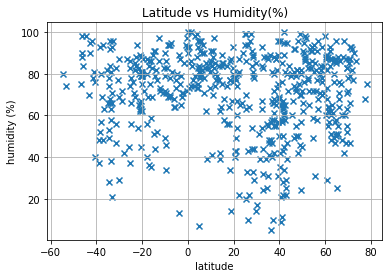

In [12]:
# create humidity vs lat scatter
x2= info_df['Latitude']
y2= info_df['Humidity']
plt.scatter(x2,y2, marker='x')
plt.grid()
plt.xlabel('latitude')
plt.ylabel('humidity (%)')
plt.title('Latitude vs Humidity(%)')
plt.savefig('hum_vs_lat.png')
plt.show
print('There is no correlation detected between latitude and humidity')

There is no correlation detected between latitude and cloudiness


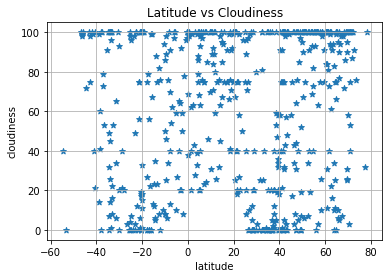

In [13]:
# create cloudiness vs lat scatter
x3= info_df['Latitude']
y3= info_df['Cloudiness']
plt.scatter(x3,y3, marker='*')
plt.grid()
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.title('Latitude vs Cloudiness')
plt.savefig('cloud_vs_lat.png')
plt.show
print('There is no correlation detected between latitude and cloudiness')

There is no correlation detected between latitude and windspeed


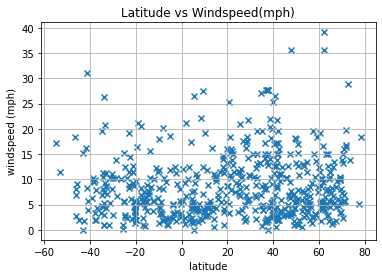

In [14]:
# create windspeed vs lat scatter
x4= info_df['Latitude']
y4= info_df['Windspeed']
plt.scatter(x4,y4, marker='x')
plt.grid()
plt.xlabel('latitude')
plt.ylabel('windspeed (mph)')
plt.title('Latitude vs Windspeed(mph)')
plt.savefig('wind_vs_lat.png')
plt.show
print('There is no correlation detected between latitude and windspeed')

## Linear Regression

### Northern Hemisphere

In [15]:
# using original dataframe create a northern hemisphere dataframe 
# in this case latitude will be > 0
# equator = 0
northern_hem_df = info_df[info_df['Latitude']>0]
northern_hem_df.head()
# save csv
northern_hem_df.to_csv('northern hemisphere df', encoding='utf-8', index=False)

The r-squared is: 0.6021049187516796


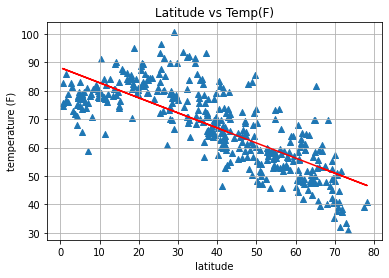

Negative correlation btwn temp and latitude; the higher you go the cooler it becomes


In [16]:
# linregress temp vs lat on scatter
yn1= northern_hem_df['Temperatures']
xn1= northern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xn1, yn1)
regress_values = xn1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xn1,yn1, marker='^')
plt.plot(xn1,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('temperature (F)')
plt.title('Latitude vs Temp(F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regNtemp_vs_lat.png')
plt.show()
print('Negative correlation btwn temp and latitude; the higher you go the cooler it becomes')

The r-squared is: 2.4293800455556472e-05


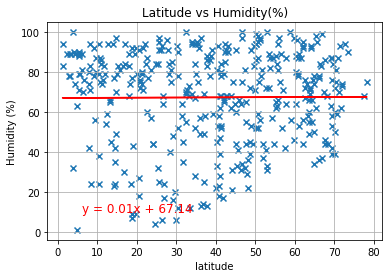

In [16]:
# linregress humidity vs lat on scatter
yn2= northern_hem_df['Humidity']
xn2= northern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xn2, yn2)
regress_values = xn1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xn2,yn2, marker='x')
plt.plot(xn2,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs Humidity(%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regNhum_vs_lat.png')
plt.show()

The r-squared is: 0.0028928147827867096


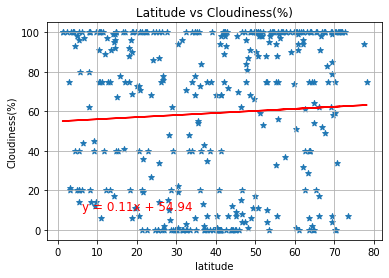

In [17]:
# linregress cloudiness vs lat on scatter
yn3= northern_hem_df['Cloudiness']
xn3= northern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xn3, yn3)
regress_values = xn3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xn3,yn3, marker='*')
plt.plot(xn3,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Latitude vs Cloudiness(%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regNcloud_vs_lat.png')
plt.show()

The r-squared is: 0.01017742241250524


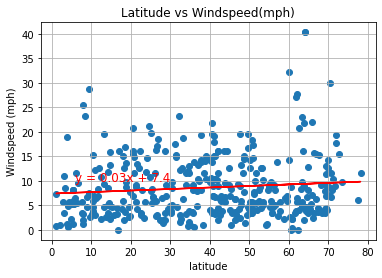

In [18]:
# linregress windspeed vs lat on scatter
yn4= northern_hem_df['Windspeed']
xn4= northern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xn4, yn4)
regress_values = xn4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xn4,yn4, marker='o')
plt.plot(xn4,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Latitude vs Windspeed(mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regNwind_vs_lat.png')
plt.show()

### Southern Hemisphere

In [18]:
# using original dataframe create a southern hemisphere dataframe 
# in this case latitude will be < 0
# equator = 0
southern_hem_df = info_df[info_df['Latitude']<0]
southern_hem_df.head()
southern_hem_df.to_csv('southern hemisphere df', encoding='utf-8', index=False)

The r-squared is: 0.700850094534845


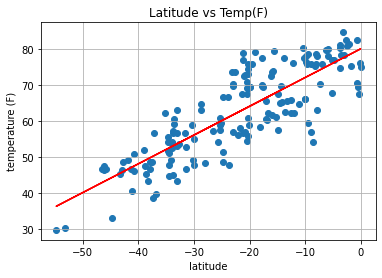

Positive correlation btwn temp and latitude; the further you go from equator the cooler it becomes


In [19]:
# linregress temp vs lat on scatter
ys1= southern_hem_df['Temperatures']
xs1= southern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs1, ys1)
regress_values = xs1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs1,ys1, marker='o')
plt.plot(xs1,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('temperature (F)')
plt.title('Latitude vs Temp(F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regStemp_vs_lat.png')
plt.show()
print('Positive correlation btwn temp and latitude; the further you go from equator the cooler it becomes')

The r-squared is: 0.00511513804314256


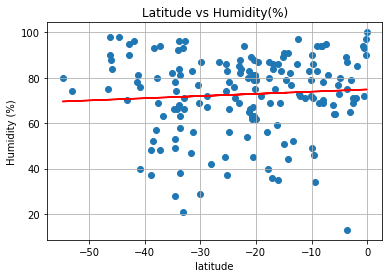

In [20]:
# linregress humidity vs lat on scatter
ys2= southern_hem_df['Humidity']
xs2= southern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs2, ys2)
regress_values = xs2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs2,ys2, marker='o')
plt.plot(xs2,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs Humidity(%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regShum_vs_lat.png')
plt.show()

The r-squared is: 0.007336613536238908


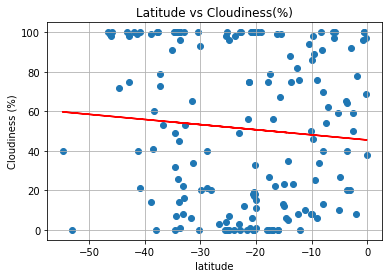

In [21]:
# linregress Cloudiness vs lat on scatter
ys3= southern_hem_df['Cloudiness']
xs3= southern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs3, ys3)
regress_values = xs3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs3,ys3, marker='o')
plt.plot(xs3,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs Cloudiness(%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regScloud_vs_lat.png')
plt.show()

The r-squared is: 0.03319408451937119


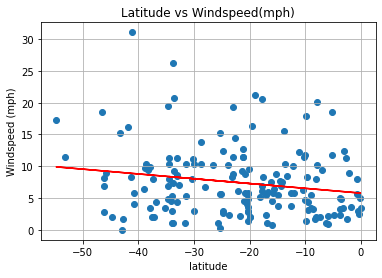

In [22]:
# linregress windspeed vs lat on scatter
ys4= southern_hem_df['Windspeed']
xs4= southern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs4, ys4)
regress_values = xs4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs4,ys4, marker='o')
plt.plot(xs4,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Latitude vs Windspeed(mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regSwind_vs_lat.png')
plt.show()